## Carga y revisión datos

In [1]:
#Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [12]:
#Carga de datos limpios
url = "https://raw.githubusercontent.com/Barblivia/alura_desafio_3_pra/main/datos_limpios.csv"
df = pd.read_csv(url)

In [13]:
# Verificar las columnas
print(df.info())
print(df['Churn_bin'].value_counts(normalize=True))  # proporción de clases

# Separar variables predictoras (X) y target (y)
X = df.drop(columns=['Churn', 'Churn_bin'])   # dejamos solo features
y = df['Churn_bin']

# Codificar variables categóricas (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

print("Shape después del one-hot:", X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   object 
 4   customer.Dependents        7043 non-null   object 
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

## Análisis de correlación

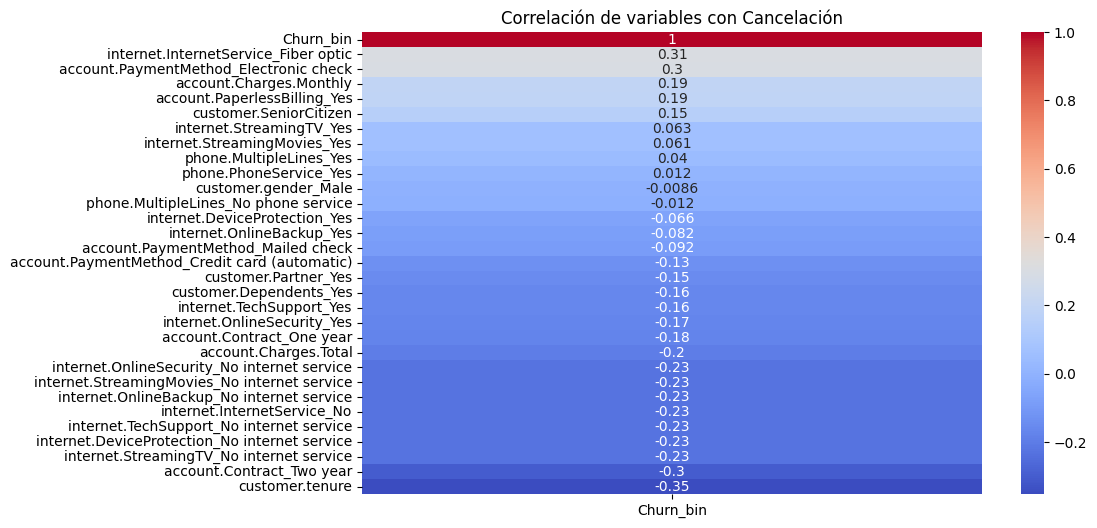

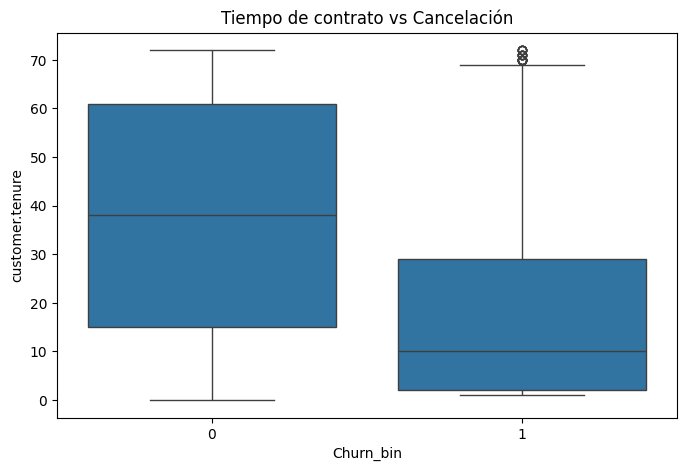

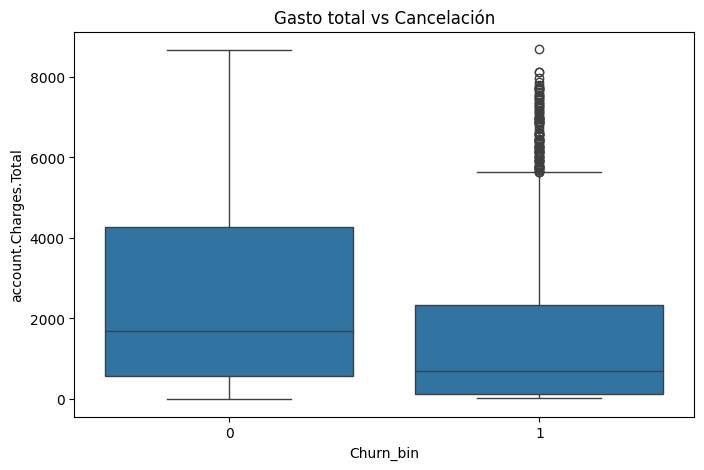

In [6]:
# Correlación con churn
corr = pd.concat([X, y], axis=1).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr[['Churn_bin']].sort_values(by='Churn_bin', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlación de variables con Cancelación")
plt.show()

# Visualización de algunas relaciones clave
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn_bin', y='customer.tenure', data=df)
plt.title("Tiempo de contrato vs Cancelación")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn_bin', y='account.Charges.Total', data=df)
plt.title("Gasto total vs Cancelación")
plt.show()

## Aplicación de modelos

In [7]:
# División en Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño Train:", X_train.shape, "Tamaño Test:", X_test.shape)

Tamaño Train: (4930, 30) Tamaño Test: (2113, 30)


In [8]:
# Aplicación de modelos con y sin normalizacion
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Normalización para Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [9]:
# evaluacion modelos
def evaluar_modelo(y_true, y_pred, nombre):
    print(f"\n--- {nombre} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("\nReporte Clasificación:")
    print(classification_report(y_true, y_pred))

# Evaluación
evaluar_modelo(y_test, y_pred_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")



--- Regresión Logística ---
Accuracy: 0.7979176526265973
Precision: 0.6401673640167364
Recall: 0.5454545454545454
F1-Score: 0.5890279114533205

Matriz de Confusión:
[[1380  172]
 [ 255  306]]

Reporte Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113


--- Random Forest ---
Accuracy: 0.7875059157595835
Precision: 0.6302325581395349
Recall: 0.483065953654189
F1-Score: 0.5469223007063572

Matriz de Confusión:
[[1393  159]
 [ 290  271]]

Reporte Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.63      0.48      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73     

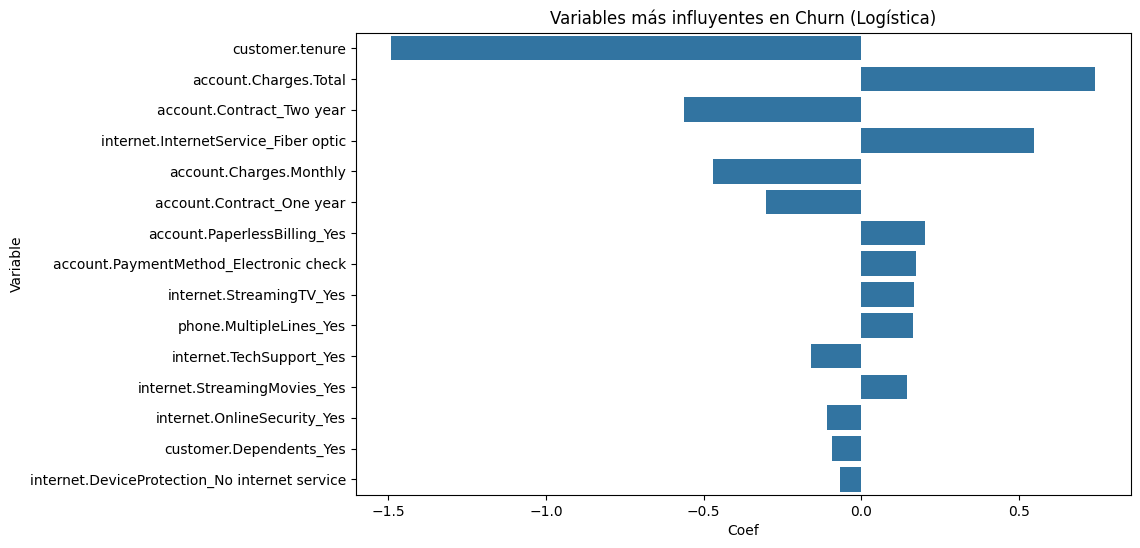

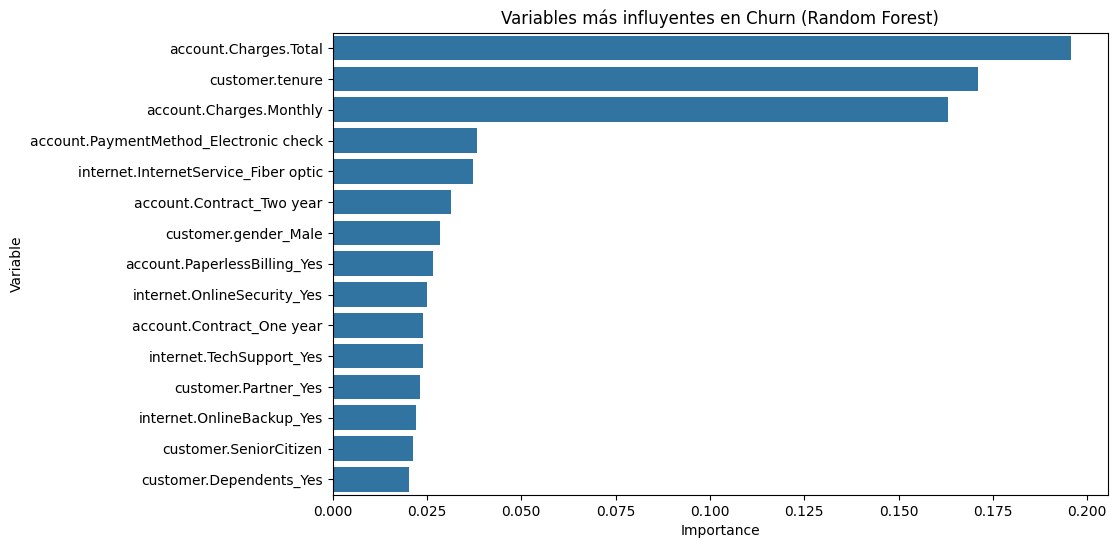

In [10]:
# Análisis de la importancia de las variables

# Coeficientes Regresión Logística
coef_importance = pd.DataFrame({
    'Variable': X.columns,
    'Coef': log_reg.coef_[0]
}).sort_values(by='Coef', key=abs, ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Coef', y='Variable', data=coef_importance.head(15))
plt.title("Variables más influyentes en Churn (Logística)")
plt.show()

# Importancia Random Forest
rf_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Variable', data=rf_importance.head(15))
plt.title("Variables más influyentes en Churn (Random Forest)")
plt.show()

#**Conclusiones**


**Objetivo**: identificar clientes con alta probabilidad de cancelar y proponer acciones para reducir la evasión.

**Resumen de hallazgos**

- 	La antigüedad del cliente (tenure) es el predictor más fuerte: clientes con poco tiempo en la compañía tienen mucha más probabilidad de cancelar.
- 	El Gasto Total acumulado se relaciona negativamente con churn: quienes han gastado más históricamente tienden a quedarse.
- 	El Cargo Mensual se relaciona positivamente con churn: clientes con facturas mensuales más altas presentan más riesgo.
- 	Variables contractuales y de servicios (principalmente tipo de contrato, y la presencia/ausencia de servicios adicionales como Online Security, Tech Support, Online Backup, Device Protection) son fuertemente asociadas al churn.
- 	El método de pago y la facturación electrónica (PaperlessBilling) también muestran asociación relevante.
- 	Perfil de riesgo típico: cliente nuevo (tenure bajo), con cargo mensual alto, contrato mes a mes, sin servicios extra (poca fidelización ).

**Impacto y recomendación sintética**: enfocar esfuerzos de retención en clientes con tenure menor (elegir meses) y cargos mensuales altos; ofrecer paquetes con OnlineSecurity/TechSupport u otros incentivos para migrar a contratos a plazo más largo.


## **Comparación de Resultados**

Se entrenaron y evaluaron dos modelos de clasificación: Random Forest y logistic Regression. A continuación se presentan un cuadro comparativo del rendimiento de los modelos.

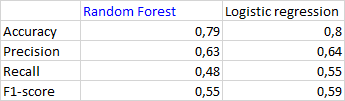


Conclusión: En 'accuracy' y 'precision' los modelos tienen una performance similar y aceptable, pero en 'Recall' performa mejor la Regresión logística, y también en F1-score. Para ambos modelos deberían realizarse ajustes, ya sea eliminando variables o ajustando los parámetros para mejorar particularmente los resultados de 'Recall' y 'F1-score'

## **Importancia de las variables**

Random Forest – Feature Importance
1.	account.Charges.Total (gasto total)
2.	account.Length (tiempo de permanencia)
3.	account.Charges.Monthly (gasto mensual)
4.	contract.Type (tipo de contrato: mensual, anual)
5.	services.Internet (tiene/no tiene Internet)
6.	support.Calls (cantidad de contactos con soporte)

Regresión Logística – Coeficientes clave:

- contract.Type = Monthly → Aumenta fuertemente la probabilidad de churn.
- account.Charges.Total → Clientes con bajo gasto acumulado muestran mayor propensión a cancelar.
- support.Calls > 4 → Asociado a mayor insatisfacción y, por tanto, mayor churn.


**Recomendaciones ampliadas**

- Campaña de retención para clientes con tenure  menor a 6 meses y MonthlyCharges altas: Ofrecer descuentos temporales, prueba gratuita de OnlineSecurity/TechSupport o plan promocional por 3–6 meses.
- Incentivar migración de contratos Month-to-month a 12/24 meses
- Oferta de servicios: Paquetes que incluyan OnlineSecurity + TechSupport +  DeviceProtection a precio promocional para clientes recién adquiridos.
- Segmentación por método de pago: para métodos asociados a churn (ej. "Electronic check"), ofrecer facilidades para pasarse a pagos automáticos (descuento o un mes gratis).
- Mejoras en la experiencia del cliente para adultos mayores (SeniorCitizen): soporte telefónico preferencial, atención personalizada.


